
# Xử lý ảnh - Bài tập Lab2




Chọn phương pháp biến đổi ảnh:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


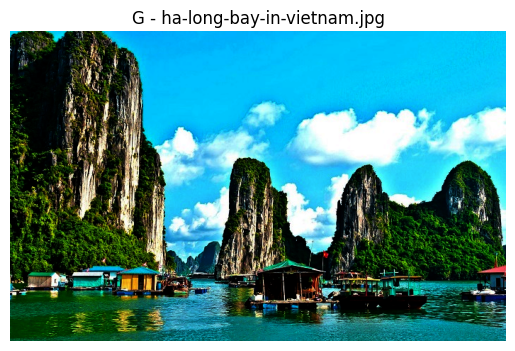

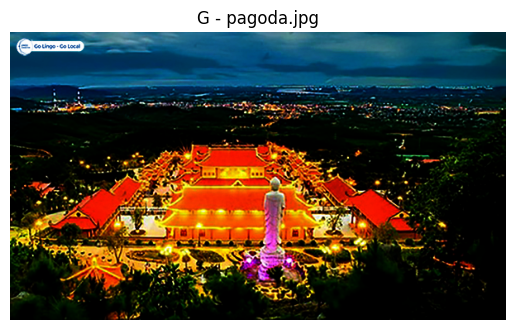

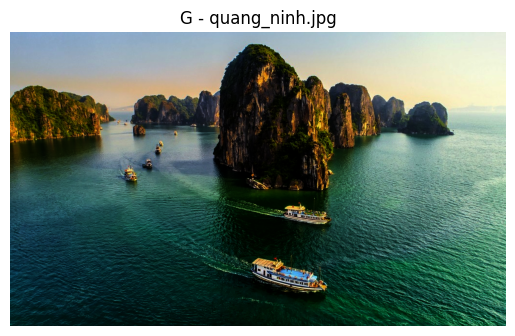

✔ Biến đổi và lưu ảnh hoàn tất.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def load_images_from_folder(folder):
    images, filenames = [], []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Biến đổi ảnh
def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_norm = img / 255.0
    img_gamma = np.power(img_norm, gamma)
    return np.uint8(img_gamma * 255)

def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    img_log = c * (np.log(1 + img.astype(np.float32)))
    return np.uint8(img_log)

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def contrast_stretching(img):
    a, b = 0, 255
    img_min = np.min(img)
    img_max = np.max(img)
    stretched = ((img - img_min) * (b - a)) / (img_max - img_min + 1e-5) + a
    return np.uint8(stretched)

# Menu
def menu():
    print("Chọn phương pháp biến đổi ảnh:")
    print("I - Image Inverse")
    print("G - Gamma Correction")
    print("L - Log Transformation")
    print("H - Histogram Equalization")
    print("C - Contrast Stretching")
    return input("Nhập lựa chọn của bạn (I/G/L/H/C): ").upper()

# Ánh xạ phím -> hàm
transform_map = {
    'I': image_inverse,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}

# Main
input_folder = "exercise"
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

images, filenames = load_images_from_folder(input_folder)
choice = menu()

if choice in transform_map:
    func = transform_map[choice]
    for img, name in zip(images, filenames):
        out = func(img.copy())
        cv2.imwrite(os.path.join(output_folder, f"{choice}_{name}"), out)
        show_image(out, f"{choice} - {name}")
    print("✔ Biến đổi và lưu ảnh hoàn tất.")
else:
    print(" Lựa chọn không hợp lệ.")


In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [2]:

def gamma_correction(img, gamma=2.2):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    return (c * np.log(1 + img)).astype(np.uint8)

def image_inverse(img):
    return 255 - img

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    return ((img - a) / (b - a) * 255).astype(np.uint8)

def histogram_equalization(img):
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)


In [3]:

def butterworth_filter(img, d0, n, highpass=False):
    dft = np.fft.fft2(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape[:2]
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow)**2 + (v - ccol)**2)
            if highpass:
                mask[u, v] = 1 / (1 + (d0 / d)**(2*n))
            else:
                mask[u, v] = 1 / (1 + (d / d0)**(2*n))

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return cv2.cvtColor(np.uint8(img_back), cv2.COLOR_GRAY2BGR)

def fast_fourier_transform(img):
    f = np.fft.fft2(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return cv2.cvtColor(np.uint8(magnitude_spectrum / np.max(magnitude_spectrum) * 255), cv2.COLOR_GRAY2BGR)


In [4]:

def random_transform_cau1(img):
    funcs = [image_inverse, gamma_correction, log_transform, histogram_equalization, contrast_stretching]
    func = random.choice(funcs)
    return func(img)

def change_rgb_order(img):
    order = [0, 1, 2]
    random.shuffle(order)
    return img[:, :, order]


In [5]:

def min_filter(img, ksize=3):
    return cv2.erode(img, np.ones((ksize, ksize), np.uint8))

def max_filter(img, ksize=3):
    return cv2.dilate(img, np.ones((ksize, ksize), np.uint8))

def random_transform_cau2(img):
    options = ['fft', 'butter_low', 'butter_high']
    choice = random.choice(options)
    if choice == 'fft':
        return fast_fourier_transform(img)
    elif choice == 'butter_low':
        filtered = butterworth_filter(img, d0=30, n=2, highpass=False)
        return min_filter(filtered)
    elif choice == 'butter_high':
        filtered = butterworth_filter(img, d0=30, n=2, highpass=True)
        return max_filter(filtered)


In [6]:

input_folder = "exercise"
images, filenames = load_images_from_folder(input_folder)

# Câu 1
for img, name in zip(images, filenames):
    for func in [image_inverse, gamma_correction, log_transform, histogram_equalization, contrast_stretching]:
        out = func(img.copy())
        cv2.imwrite(f"output/cau1_{func.__name__}_{name}", out)

# Câu 2
for img, name in zip(images, filenames):
    fft_img = fast_fourier_transform(img.copy())
    low = butterworth_filter(img.copy(), d0=30, n=2, highpass=False)
    high = butterworth_filter(img.copy(), d0=30, n=2, highpass=True)
    cv2.imwrite(f"output/cau2_fft_{name}", fft_img)
    cv2.imwrite(f"output/cau2_butterlow_{name}", low)
    cv2.imwrite(f"output/cau2_butterhigh_{name}", high)

# Câu 3
for img, name in zip(images, filenames):
    rgb_changed = change_rgb_order(img.copy())
    result = random_transform_cau1(rgb_changed)
    cv2.imwrite(f"output/cau3_{name}", result)

# Câu 4
for img, name in zip(images, filenames):
    rgb_changed = change_rgb_order(img.copy())
    result = random_transform_cau2(rgb_changed)
    cv2.imwrite(f"output/cau4_{name}", result)


C:\Users\Admin\AppData\Local\Temp\ipykernel_41480\1656532185.py:7: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\Admin\AppData\Local\Temp\ipykernel_41480\1656532185.py:7: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
C:\Users\Admin\AppData\Local\Temp\ipykernel_41480\1656532185.py:8: RuntimeWarning: divide by zero encountered in log
  return (c * np.log(1 + img)).astype(np.uint8)
C:\Users\Admin\AppData\Local\Temp\ipykernel_41480\1656532185.py:8: RuntimeWarning: invalid value encountered in multiply
  return (c * np.log(1 + img)).astype(np.uint8)
C:\Users\Admin\AppData\Local\Temp\ipykernel_41480\1656532185.py:8: RuntimeWarning: invalid value encountered in cast
  return (c * np.log(1 + img)).astype(np.uint8)
C:\Users\Admin\AppData\Local\Temp\ipykernel_41480\2820701226.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  mask[u, v] = 1 / (1 + (d0 / d)**(2*n))
